In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import torch
from IPython.display import Audio

In [2]:
from speechbrain.pretrained import SepformerSeparation as separator
from utils import select_random_files, form_pairs, separate_pair, compare_sources_with_predictions

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Generating random pairs

In [4]:
selected_files = select_random_files(files_per_folder=2, seconds_considered=5, specify_sex='F')
formed_pairs = form_pairs(selected_files)

In [5]:
formed_pairs = formed_pairs[:3]

## Extracting one random pair

In [6]:
pair = random.sample(formed_pairs, 1)
file1, file2 = pair[0].split('-')

## Loading model and separating audios

In [7]:
if device == torch.device("cuda"):
    model = separator.from_hparams(source="speechbrain/sepformer-whamr", savedir='pretrained_models/sepformer-whamr', run_opts={"device":"cuda"})
else:
    model = separator.from_hparams(source="speechbrain/sepformer-whamr", savedir='pretrained_models/sepformer-whamr')

In [8]:
mixture, sources, predictions = separate_pair(pair[0], model, device)
[audio1, audio2] = sources
[es1, es2] = predictions

## Analyzing results

### First prediction

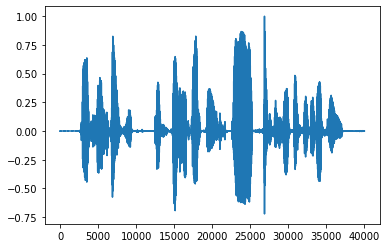

In [9]:
plt.plot(es1)

### Second prediction

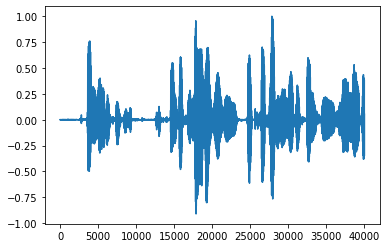

In [10]:
plt.plot(es2)

### First source

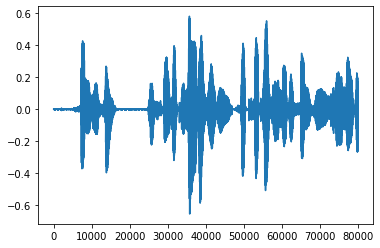

In [11]:
plt.plot(audio1)

### Second source

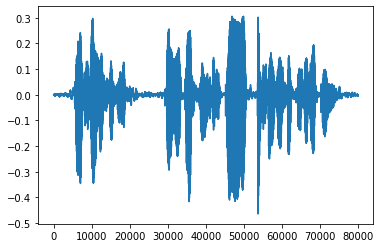

In [12]:
plt.plot(audio2)

### Linking sources to corresponding predictions

In [13]:
set1, set2 = compare_sources_with_predictions(sources, predictions)

In [14]:
wavfile.write("model_validation_ff/mixture.wav", int(16e3), mixture)
wavfile.write("model_validation_ff/audio1.wav", int(8e3), set1[0])
wavfile.write("model_validation_ff/audio2.wav", int(8e3), set2[0])
wavfile.write("model_validation_ff/es1.wav", int(8e3), set1[1])
wavfile.write("model_validation_ff/es2.wav", int(8e3), set2[1])

### Mixture

In [15]:
Audio("model_validation_ff/mixture.wav")

### First batch of corresponding source and prediction

In [16]:
Audio("model_validation_ff/audio1.wav")

In [17]:
Audio("model_validation_ff/es1.wav")

### Second batch of corresponding source and prediction

In [18]:
Audio("model_validation_ff/audio2.wav")

In [19]:
Audio("model_validation_ff/es2.wav")